In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Example 1: consider loss only

epoch=0, loss=1, w=0.19998999999992773
epoch=1, loss=0.6400160001001156, w=0.3599819999998699
epoch=2, loss=0.4096230403241665, w=0.48797559999985696
epoch=3, loss=0.2621689861955065, w=0.5903704799998799
epoch=4, loss=0.16779634365552878, w=0.6722863839998816
epoch=5, loss=0.10739621411187306, w=0.7378191071999024
epoch=6, loss=0.06873882054945626, w=0.7902452857599107
epoch=7, loss=0.04399704014594152, w=0.8321862286079229
epoch=8, loss=0.028161461868832314, w=0.8657389828863361
epoch=9, loss=0.01802602071639555, w=0.8925811863090688
epoch=10, loss=0.011538801534766989, w=0.9140549490472532
epoch=11, loss=0.007386551783270252, w=0.9312339592378012
epoch=12, loss=0.004728768362108391, w=0.9449771673902393
epoch=13, loss=0.0030275121084017463, w=0.95597173391219
epoch=14, loss=0.001938488214698997, w=0.9647673871297511
epoch=15, loss=0.0012413370096648303, w=0.9718039097038002
epoch=16, loss=0.0007950195079914553, w=0.9774331277630395
epoch=17, loss=0.0005092637225592996, w=0.981936502

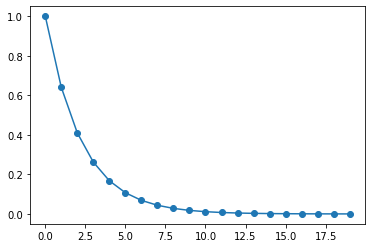

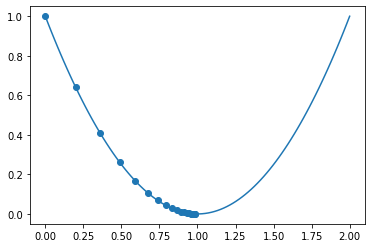

In [6]:
# goal: find a "w" that minimize loss
# ml pipeline step 4
def loss(w):
    return (w-1)**2 # w=1 -> loss is minimum 0

# ml pipeline step 5
w = 0 # initial position (guess) # w: weight
lr = 0.1 # learning rate # step interval
h = 1e-4 # dx
lossL = [] # record loss every steps
weightL = [] # record weight every steps

for i in range(20): # 20 iterations # 20=step=epoch
    # forward pass
    l = loss(w)
    weightL.append(w)
    lossL.append(l)
    # compute gradient (equal to slope if function is 1-d)
    lh = loss(w+h)
    grad = (lh-l)/h # if grad>0 move left; else grad<0 move right
    # update
    w = w-lr*grad
    print(f"epoch={i}, loss={l}, w={w}")
    
plt.plot(lossL) # 折線圖
plt.scatter(list(range(len(lossL))),lossL) # 散點圖 # X=[0,1,2,3,..,19],Y=lossL
plt.show()

X = np.linspace(0,2,100) # [0, 0.02, 0.04, 0.06, ..., 1.98, 2]
plt.plot(X, loss(X))
plt.scatter(weightL, lossL)
plt.show()

### Example 2: consider both data and loss

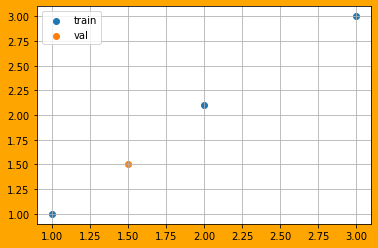

In [4]:
# Linear regression
# ml pipeline step 1: get data
X = np.array([1,2,3,1.5])
yTrue = np.array([1,2.1,3,1.5])

# ml pipeline step 2: split training and validation data
XTrain = X[:3]
yTrueTrain = yTrue[:3]
XVal     = X[3:]
yTrueVal = yTrue[3:]

fig = plt.figure()
fig.set_facecolor("orange")
plt.scatter(XTrain,yTrueTrain)
plt.scatter(XVal,yTrueVal)
plt.legend(labels=["train","val"])
plt.grid('on')
plt.show()

In [5]:
# ml pipeline step 3: define model # y=ax+b # find a,b (weights)
class Model:
    def __init__(self, a=0, b=0):
        self.a, self.b = a, b
    def predict(self, x, ha=0, hb=0): # y=ax+b # best answer (a,b)=(1,0) # x: can be number or np.array[number]
        return (self.a+ha)*x + (self.b+hb)
    
model = Model(5, 3)
print( model.a, model.b ) # 5, 3
print( model.predict(2) ) # 5*2+3=13
print( model.predict( np.array([0,1,2]) ) ) # [0*5+3,1*5+3,2*5+3] = [3,8.13]

# ml pipeline step 4: define loss function # to judge a set of weights (a,b) is good or bad 
def mse(yTrue,yPred): # mean square error # loss=sum(yTrue-yPred)**2
    return sum( (yTrue-yPred)**2 ) / len(yTrue)
   
print( mse( np.array([1, 2.1, 3]), np.array([1, 2.1, 3]) ) ) # 0
print( mse( np.array([1, 2.1, 3]), np.array([1, 2, 3]) ) ) # (0**2+0.1**2+0**2)/3 = 0.01/3 = 0.00333...
# target: find best (a,b) such that mse(yTrue,yPred) is minimum

5 3
13
[ 3  8 13]
0.0
0.003333333333333339


In [8]:
# ml pipeline step 5: find best (model.a, model.b) to minimize mse
model = Model() # a,b = (0,0) # initial weight
lossL, aL, bL = [], [model.a], [model.b] # record the loss, weight-a, weight-b of each step
lr = 5e-2 # 5*10**-2
h = 1e-4

for i in range(500):
    # forward pass
    yPred = model.predict(XTrain) # i=0, a=0, b=0, X=[1,2.1,3] -> yPred=[0,0,0]
    loss = mse(yTrueTrain,yPred)  # loss(a,b) # mse(yTrue,model.predict(X)) = mse(yTrue, model.a*X+model.b) = mse(a,b)
    # backward pass: compute gradient
    yPred_a = model.predict(XTrain,ha=h) # f(a+h,b)
    yPred_b = model.predict(XTrain,hb=h) # f(a,b+h)
    loss_a = mse(yTrueTrain, yPred_a) # loss(a+h,b)
    loss_b = mse(yTrueTrain, yPred_b) # loss(a,b+h)
    grad_a = (loss_a-loss)/h # ∂loss/∂a = (loss(a+h,b)-loss(a,b))/h
    grad_b = (loss_b-loss)/h # ∂loss/∂b = (loss(a,b+h)-loss(a,b))/h
    # update
    model.a -= lr*grad_a
    model.b -= lr*grad_b
    
    lossL.append(loss)
    aL.append(model.a)
    bL.append(model.b)
    print(f"epoch={i}, model.a={round(model.a,4)}, model.b={round(model.b,4)}, loss={round(loss,4)}")

epoch=0, model.a=0.4733, model.b=0.2033, loss=4.8033
epoch=1, model.a=0.6851, model.b=0.2917, loss=0.9675
epoch=2, model.a=0.7804, model.b=0.3288, loss=0.2064
epoch=3, model.a=0.8237, model.b=0.3432, loss=0.0551
epoch=4, model.a=0.844, model.b=0.3474, loss=0.0248
epoch=5, model.a=0.854, model.b=0.3472, loss=0.0185
epoch=6, model.a=0.8593, model.b=0.345, loss=0.0169
epoch=7, model.a=0.8626, model.b=0.342, loss=0.0163
epoch=8, model.a=0.865, model.b=0.3386, loss=0.016
epoch=9, model.a=0.8669, model.b=0.3351, loss=0.0156
epoch=10, model.a=0.8686, model.b=0.3315, loss=0.0153
epoch=11, model.a=0.8703, model.b=0.328, loss=0.015
epoch=12, model.a=0.8719, model.b=0.3245, loss=0.0147
epoch=13, model.a=0.8734, model.b=0.321, loss=0.0144
epoch=14, model.a=0.8749, model.b=0.3175, loss=0.0141
epoch=15, model.a=0.8764, model.b=0.3141, loss=0.0138
epoch=16, model.a=0.8779, model.b=0.3107, loss=0.0135
epoch=17, model.a=0.8794, model.b=0.3074, loss=0.0133
epoch=18, model.a=0.8808, model.b=0.3041, loss=

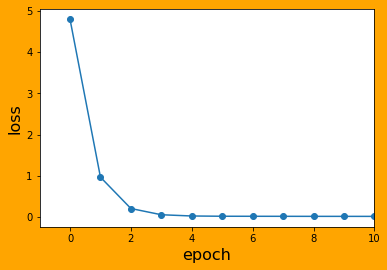

In [9]:
fig = plt.figure()
fig.set_facecolor("orange")
plt.plot(lossL)
plt.scatter(list(range(len(lossL))),lossL)
plt.xlim(-1,10)
plt.xlabel("epoch", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.show()

5.031717296866411
[1.53365727] [1.5]
0.0011328121288361026
0.9994457206673409 0.03448869352970646


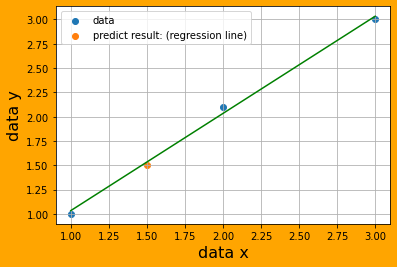

In [13]:
# ml pipeline step 6: predict
print(model.predict(5))
yPredVal = model.predict(XVal)
print( yPredVal, yTrueVal ) # validation predict result # validation ground truth
print( mse(yTrueVal,yPredVal) ) # loss of validation -> machine learning task goodness
print(model.a, model.b)

xlin  = np.linspace(1,3,100)
yPred = model.predict(xlin)

fig = plt.figure()
fig.set_facecolor("orange")
plt.scatter(XTrain,yTrueTrain)
plt.scatter(XVal,yTrueVal)
plt.plot(xlin, yPred, c="green")
plt.grid('on')
plt.legend(labels=["data","predict result: (regression line)"])
plt.xlabel("data x", fontsize=16)
plt.ylabel("data y", fontsize=16)
plt.show()

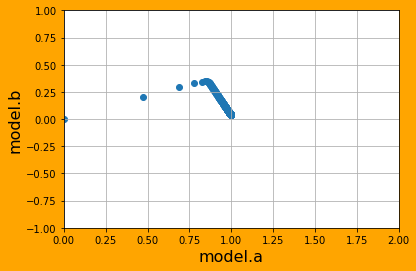

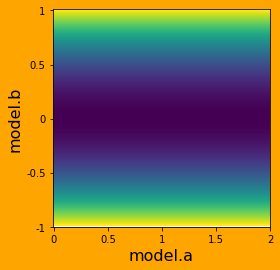

In [59]:
fig = plt.figure()
fig.set_facecolor('orange')
plt.scatter(aL[::], bL[::])
plt.xlim(0,2)
plt.ylim(-1,1)
plt.grid('on')
plt.xlabel("model.a", fontsize=16)
plt.ylabel("model.b", fontsize=16)
plt.show()

A = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
L = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        L[i][j] = ( (A[i]-1)**2+B[i]**2 )/2 # ((a-1)**2 + (b-0)**2)/2
fig = plt.figure()
fig.set_facecolor('orange')
plt.imshow(L)
plt.xticks([0,25,50,75,100], [0,0.5,1,1.5,2] )
plt.yticks([0,25,50,75,100], [1,0.5,0,-0.5,-1] )
plt.xlabel("model.a", fontsize=16)
plt.ylabel("model.b", fontsize=16)
plt.show()

In [ ]:
## Machine learning: hand made
# linear regression
# 1-D classification: Guassian distribution

## Machine learning: scikit learn
# linear regression
# SVM
# Kmeans
# PCA
# T-SNE
# decision tree / random forest / adaboost / ...

## Deep learning: Pytorch
# DNN
# CNN
# RNN-LSTM
# WGAN
# anomaly detection
# few shot learning